<h1><center>Titanic Predictions</center></h1>

This is a challenge from Kaggle plataform which proposes the construction of a predict model that answer the following question: “what sorts of people were more likely to survive?”.

### Packages and libraries

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from imblearn.over_sampling import SMOTE

### Data imports

In [201]:
test_dataset = pd.read_csv('test.csv')
train_dataset = pd.read_csv('train.csv')

In [202]:
test_dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


We use the train_dataset to train the model and after aplly on test_dataset

## Exploratory Analysis

In [203]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [204]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [205]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Variables

survival: Survival(0 = No, 1 = Yes)
pclass: Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
sex: Sex	
Age: Age in years	
sibsp: # of siblings / spouses aboard the Titanic	
parch: # of parents / children aboard the Titanic	
ticket: Ticket number	
fare: Passenger fare	
cabin: Cabin number	
embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [206]:
train_dataset.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

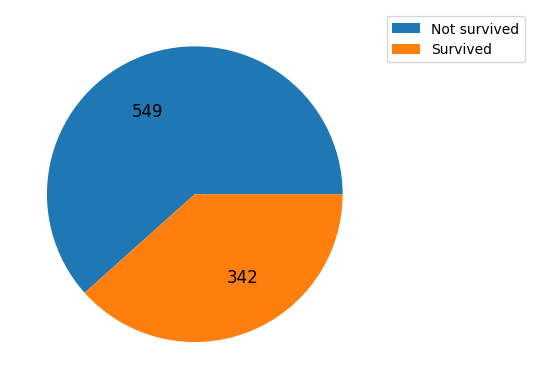

In [207]:
ax = plt.pie(train_dataset.Survived.value_counts(), labels=(train_dataset.Survived.value_counts().values), 
             labeldistance=0.6, textprops={'fontsize':12})
plt.legend(['Not survived','Survived'],bbox_to_anchor=(1,1))

ax = ax

#### PassengerId, Name and Ticket

This variables is not important to the analysis and to the model cause every passenger has your own Id, Name and Ticket and it has no influence on the results of the disaster.

In [208]:
train_dataset.drop(columns=['PassengerId','Name','Ticket'], axis=1, inplace=True)
train_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


#### Pclass

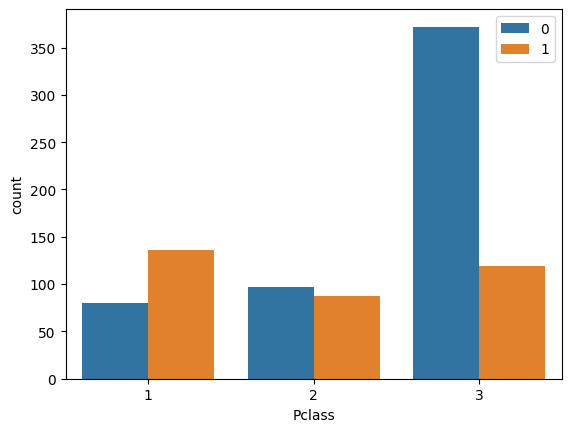

In [209]:
ax = sns.countplot(x='Pclass', data=train_dataset, hue='Survived')
plt.legend(bbox_to_anchor=(1,1))
ax = ax

#### Sex

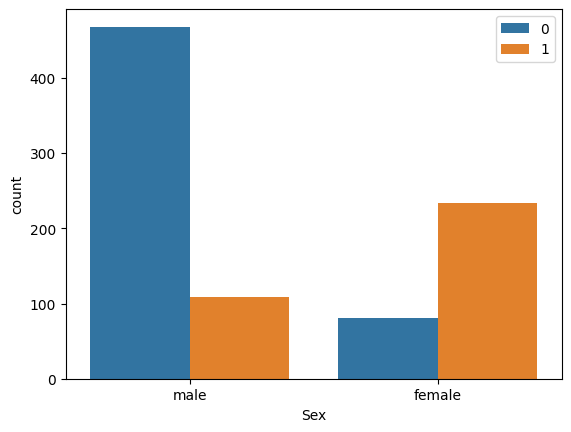

In [210]:
ax = sns.countplot(x='Sex', data=train_dataset, hue='Survived')
plt.legend(bbox_to_anchor=(1,1))
ax = ax

#### Age

There is 177 missing values for Age variable, so i'll fill with the mean on this missing values.

In [211]:
# before the filling 
train_dataset['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [212]:
train_dataset['Age'].fillna(np.mean(train_dataset['Age']), inplace=True)

In [213]:
# after the filling
train_dataset['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [214]:
survived = train_dataset.query('Survived == 1')
not_survived = train_dataset.query('Survived == 0')

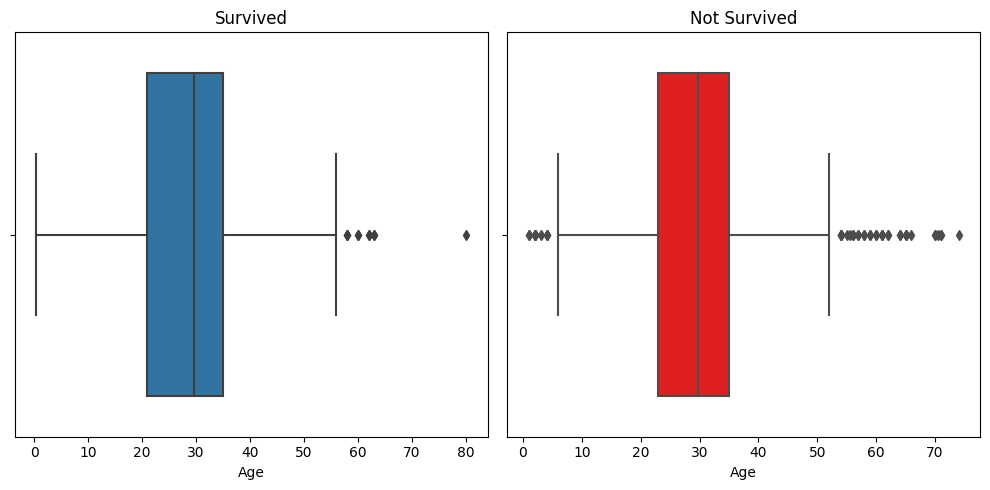

In [215]:
ax = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(data=survived, x='Age')
plt.title('Survived')

plt.subplot(1,2,2)
sns.boxplot(data=not_survived, x='Age', color='r')
plt.title('Not Survived')


plt.tight_layout()

#### SibSp

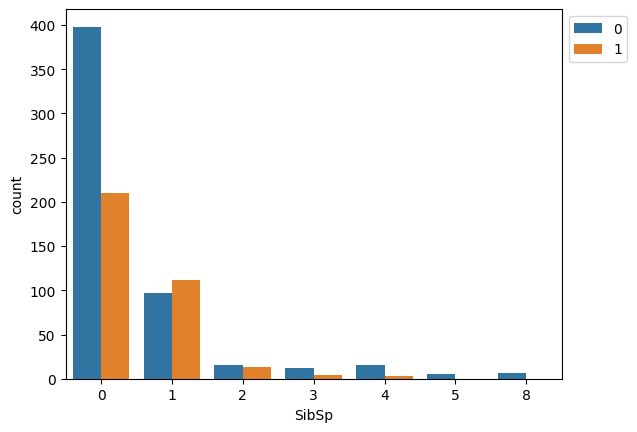

In [216]:
ax = sns.countplot(x='SibSp', data=train_dataset, hue='Survived')
plt.legend(bbox_to_anchor=(1,1))
ax = ax

#### Parch

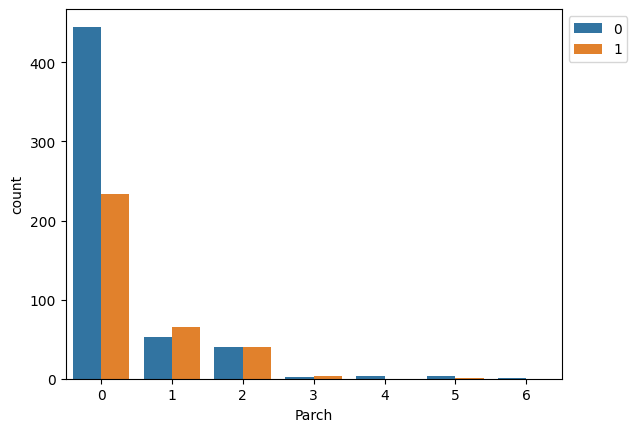

In [217]:
ax = sns.countplot(x='Parch', data=train_dataset, hue='Survived')
plt.legend(bbox_to_anchor=(1,1))
ax = ax

#### Fare

In [218]:
train_dataset.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

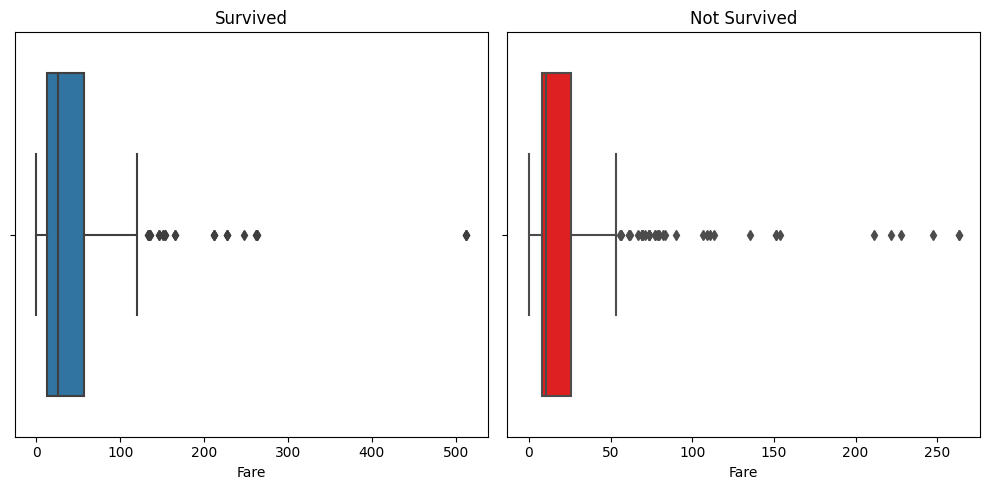

In [219]:
ax = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(data=survived, x='Fare')
plt.title('Survived')

plt.subplot(1,2,2)
sns.boxplot(data=not_survived, x='Fare', color='r')
plt.title('Not Survived')


plt.tight_layout()

#### Cabin

In [220]:
train_dataset.Cabin.isna().sum()

687

In [221]:
train_dataset.drop('Cabin', axis=1, inplace=True)

In [222]:
train_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Embarked

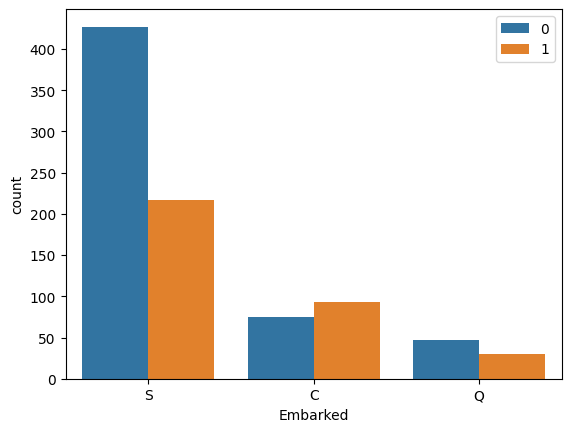

In [223]:
ax = sns.countplot(x='Embarked', data=train_dataset, hue='Survived')
plt.legend(bbox_to_anchor=(1,1))
ax = ax

There is 2 missing values, so i'll delete then.

In [224]:
train_dataset.dropna(inplace=True)

In [225]:
train_dataset.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [226]:
train_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Pre-processing

### Encoding

In [227]:
X = train_dataset.drop('Survived',axis=1)
y = train_dataset.Survived

In [228]:
categoric_columns = ['Pclass','Sex','Embarked']

In [229]:
ohe = make_column_transformer(
    (OneHotEncoder(), categoric_columns),
    remainder='passthrough')

dataset_ohe = ohe.fit_transform(X)

In [230]:
dataset_ohe = pd.DataFrame(dados_ohe, columns=ohe.get_feature_names_out())
dataset_ohe.head()

,onehotencoder__Pclass_1,onehotencoder__Pclass_2,onehotencoder__Pclass_3,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,35.0,0.0,0.0,8.0500


In [231]:
dataset_ohe.describe()

,onehotencoder__Pclass_1,onehotencoder__Pclass_2,onehotencoder__Pclass_3,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.240720,0.206974,0.552306,0.350956,0.649044,0.188976,0.086614,0.724409,29.653446,0.524184,0.382452,32.096681
std,0.427761,0.405365,0.497536,0.477538,0.477538,0.391710,0.281427,0.447063,12.968366,1.103705,0.806761,49.697504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200


### Scaler

In [232]:
scaler = MinMaxScaler()

dataset_scaled = scaler.fit_transform(dataset_ohe)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset_ohe.columns)

In [233]:
dataset_scaled.describe()

,onehotencoder__Pclass_1,onehotencoder__Pclass_2,onehotencoder__Pclass_3,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.240720,0.206974,0.552306,0.350956,0.649044,0.188976,0.086614,0.724409,0.367347,0.065523,0.063742,0.062649
std,0.427761,0.405365,0.497536,0.477538,0.477538,0.391710,0.281427,0.447063,0.162960,0.137963,0.134460,0.097003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271174,0.000000,0.000000,0.015412
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.367921,0.000000,0.000000,0.028213
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Target balance

<AxesSubplot:xlabel='Survived', ylabel='count'>

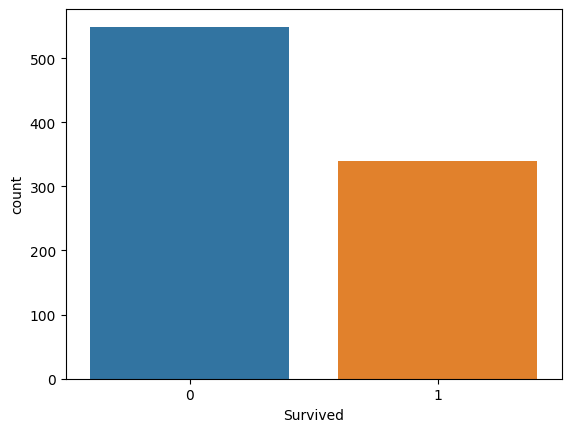

In [234]:
sns.countplot(x=y)

In [235]:
SEED = 42

sm = SMOTE(random_state=SEED)

X_balanced, y_balanced = sm.fit_resample(dataset_scaled, y)

<AxesSubplot:xlabel='Survived', ylabel='count'>

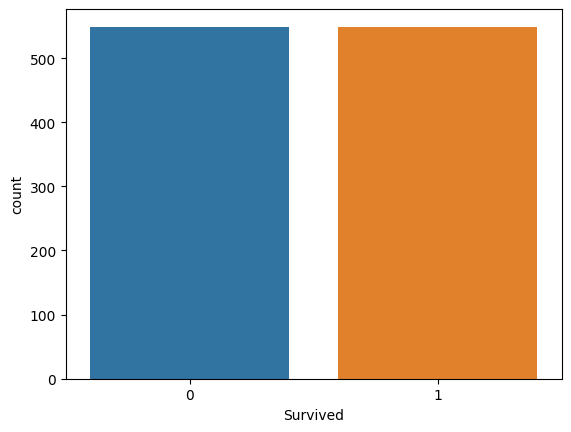

In [236]:
sns.countplot(x=y_balanced)

## ML Models

In [237]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [238]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [239]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [240]:
test_dataset.dropna(inplace=True)

In [241]:
X_test = test_dataset.drop(['Name','PassengerId','Ticket','Cabin'], axis=1)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,female,23.0,1,0,82.2667,S
14,1,female,47.0,1,0,61.1750,S
24,1,female,48.0,1,3,262.3750,C
26,1,female,22.0,0,1,61.9792,C
28,1,male,41.0,0,0,30.5000,S


In [242]:
ohe_test = make_column_transformer(
    (OneHotEncoder(), categoric_columns),
    remainder='passthrough')

df_ohe_test = ohe_test.fit_transform(X_test)

In [243]:
df_ohe_test = pd.DataFrame(df_ohe_test, columns=ohe_test.get_feature_names_out())
df_ohe_test.head()

,onehotencoder__Pclass_1,onehotencoder__Pclass_2,onehotencoder__Pclass_3,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,23.0,1.0,0.0,82.2667
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,47.0,1.0,0.0,61.1750
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,48.0,1.0,3.0,262.3750
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,22.0,0.0,1.0,61.9792
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,41.0,0.0,0.0,30.5000


### Random Forest Classifier

In [244]:
rfc = RandomForestClassifier(random_state=SEED)
rfc.fit(X_balanced, y_balanced)

RandomForestClassifier(random_state=42)

In [253]:
predict = rfc.predict(df_ohe_test)

In [257]:
results = pd.DataFrame({'PassengerId':test_dataset['PassengerId'], 'Survived':predict})

In [258]:
results

,PassengerId,Survived
12,904,1
14,906,1
24,916,1
26,918,1
28,920,0
...,...,...
404,1296,0
405,1297,0
407,1299,0
411,1303,1
